In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

from utils import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Đọc dữ liệu từ file zip

In [3]:
def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [4]:
extract_zip('data/raw/Dataset.zip', 'data/root')

In [5]:
len(os.listdir('data/fulldata/test/img'))

1404

# Di chuyển file

In [3]:
char_list = set()

In [4]:
root = 'data/fulldata/train'
# dataPath = 'InkData_line_processed'

In [5]:
cnt = 0
char_count = []
list_str = {}
err = []
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'
        
        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
        #     char_list.update(content)
            
        # num = len(content)
        # if num in list_str.keys():
        #     list_str[num].append(path)
        # else:
        #     list_str[num] = [path]

        # Đọc img
        # if len(content) in range(40, 100):
        img = Image.open(imgpath).convert('L')
        img = img.point(lambda p: 255 - p) # chuyển background về màu đen 0

        img = utils.cropImg(img)
        w, h = img.size
        #     # size.append(img.size)
        if w / h * 32 > 800:
            # print(w, h, w/h*32, path, ": ", content)
            err.append(path)
        #         img.show()
        #         print(content)
        #         # print(imgpath)
        #         invalid_img.append(imgpath)uuuu
        #         invalid_cnt.append(len(content))
        #         break
        # Di chuyển file------------------------------------------
        # if len(content) in range(51, 96):
        # shutil.copy(imgpath, 'data/4/img') # Di chuyển file 
        # shutil.copy(labelpath, 'data/4/label') # Di chuyển file 

In [6]:
len(err)

16

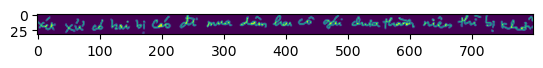

In [7]:
path = 'data/fulldata/train/img/20160722_0201_26749_2_tg_0_3.png'
img_tensor = utils.img_loader(path, imgH = 32, imgW = 800, scale = False,  alignment = 'left')

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])

In [10]:
img = Image.open(path).convert('L')
img = img.point(lambda p: 255 - p) # chuyển background về màu đen 0

img = utils.cropImg(img)
w, h 

(2267, 170)

In [11]:
len('Văn phòng Ngân hàng thế giới (WB) tại VN cho biết từ ngày 25 - 27 / 3, tại Thượng Hải')

85

In [47]:
lst= list(char_list)

In [48]:
lst.sort()
lst

[' ',
 '!',
 '"',
 '%',
 '&',
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 'y',
 'z',
 'Á',
 'Â',
 'Ô',
 'Ú',
 'Ý',
 'à',
 'á',
 'â',
 'ã',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ò',
 'ó',
 'ô',
 'õ',
 'ù',
 'ú',
 'ý',
 'Ă',
 'ă',
 'Đ',
 'đ',
 'ĩ',
 'ũ',
 'Ơ',
 'ơ',
 'Ư',
 'ư',
 'ạ',
 'ả',
 'Ấ',
 'ấ',
 'Ầ',
 'ầ',
 'ẩ',
 'ẫ',
 'ậ',
 'ắ',
 'ằ',
 'ẳ',
 'ẵ',
 'ặ',
 'ẹ',
 'ẻ',
 'ẽ',
 'ế',
 'ề',
 'ể',
 'ễ',
 'ệ',
 'ỉ',
 'ị',
 'ọ',
 'ỏ',
 'ố',
 'Ồ',
 'ồ',
 'ổ',
 'ỗ',
 'ộ',
 'ớ',
 'ờ',
 'Ở',
 'ở',
 'ỡ',
 'ợ',
 'ụ',
 'Ủ',
 'ủ',
 'ứ',
 'ừ',
 'ử',
 'ữ',
 'ự',
 'ỳ',
 'ỷ',
 'ỹ']

In [49]:
''.join(lst)

' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [50]:
len(lst)

154

In [52]:
s= ' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'
for i, c in enumerate(s):
    if c != lst[i]: print(i, c, lst[i])

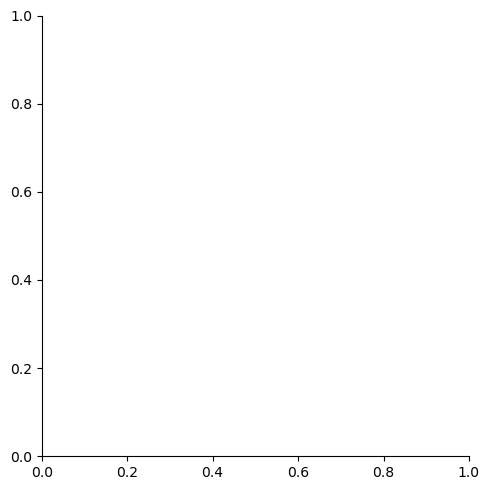

In [10]:
sns.displot(char_count)

In [26]:
''.join(char_list)

'qŨẾỷĐ:w_TầỎOỳNÐfứFƠÀỐc&ùẵẳ^ặÂè"mẫếŌ6âỰ…ềvõạoāBẬệơỖÚẰDỒ?iỂừĨ4]ỡKíỮỠeịỶìVỦ$ĩẢđỪẺ’ấòkū,\'ểỗáÃpÊỊỉôÖằ“ũ²JéüẶỈẩờủIẦẠễÕXýúu;2ổỏ!ộyàẪẮỀ—Ụl)Ẹ1ốỸLG8gĂ+Ễỵ95ÒẼHỆQỴZYhỌỞ ”ảẤ(Ư0ÉÍ|Ờ–Cj−AÌt.ỹōS[ở3ŪồsrẽêớỘWữọPăẹMỬụửợỚậÙ7xÈưaEbỔỲnÔ%ẨẻẲĀ-°ẴÁdzU/ÝắỨãỢÓựRöó'

# split data

In [11]:
len(list_str)

81

In [12]:
from sklearn.model_selection import train_test_split

train_data = []
test_data = []
for k in list_str.keys():
    try:
        train, test = train_test_split(list_str[k], test_size = 0.2, random_state=42)
        train_data.extend(train)
        test_data.extend(test)
    except:
        print(len(list_str[k]))
        train_data.extend(list_str[k])

1


In [13]:
print(len(train_data))
root = 'data/fulldata'
# dataPath = 'InkData_line_processed'
for path in train_data:
    imgpath = root + '/img/' + path
    labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/fulldata/train/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/fulldata/train/label') # Di chuyển file 

5459


In [14]:
print(len(test_data))
root = 'data/fulldata'
# dataPath = 'InkData_line_processed'
for path in test_data:
    imgpath = root + '/img/' + path
    labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/fulldata/test/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/fulldata/test/label') # Di chuyển file 

1404


In [16]:
len(os.listdir('data/data2/train/img')), len(os.listdir('data/data2/test/label'))

(8000, 2000)

In [47]:
assert len(os.listdir('data/train/img')) == len(os.listdir('data/train/label'))

In [48]:
assert len(os.listdir('data/test/img')) == len(os.listdir('data/test/label'))

# check size

In [14]:
root = 'data/train/img'
len(os.listdir(root))

4936

In [11]:
cnt = 0
char_count = []
width_list = []
for path in os.listdir(root):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/' + path
        labelpath = root + '/' + os.path.splitext(path)[0] + '.txt'
        
        # assert labelpath in os.listdir(root), labelpath

        # Đọc text
        # with open(labelpath, 'r') as f:
        #     content = f.readline().rstrip('\n').strip()
        #     char_count.append(len(content))

        img = Image.open(imgpath)
        width_list.append(img.width/ img.height * 32)
        # Kiểm tra ảnh có độ dài từ 35-40
        # if len(content) in range(35, 40):
        #     print(len(content))
        #     img = Image.open(imgpath)
        #     img.show()
        #     cnt += 1

        # if cnt > 10: break

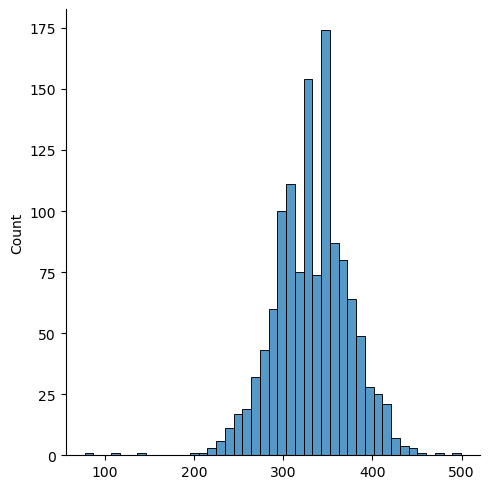

In [12]:
sns.displot(width_list)

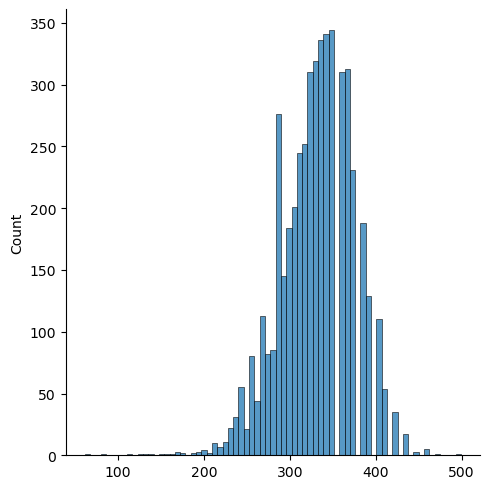

In [9]:
sns.displot(width_list)

## Check số kí tự

In [15]:
root = 'data/raw/tuandat/Data'
char_count = []
invalid_img = []
for path in os.listdir(root + '/img'):
    imgpath = root + '/img/' + path
    labelpath = root + '/text/' + os.path.splitext(path)[0] + '.txt'

    # Đọc text
    with open(labelpath, 'r') as f:
        content = f.readline().rstrip('\n').strip()
        # if '-' in content:
        #     print(path)
        # char_list.update(set(content))
        char_count.append(len(content))
        
    # Đọc img
    img = Image.open(imgpath).convert('L')
    w, h = img.size
    # size.append(img.size)
    if w / h > 512/32:
        print(imgpath)
        invalid_img.append(imgpath)
    

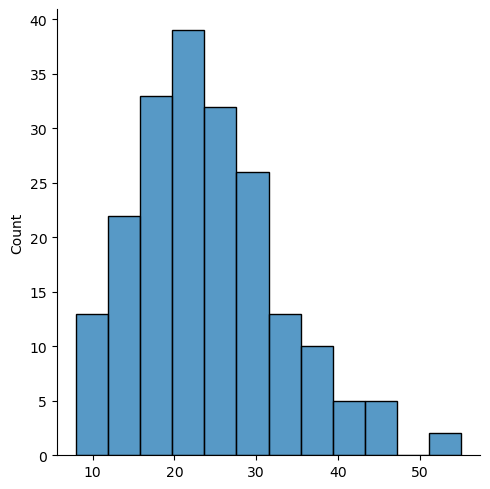

In [16]:
sns.displot(char_count)

## Check hình ảnh

In [13]:
from dataset import DatasetImg
from PIL import Image
import os
import matplotlib.pyplot as plt

from utils import utils

['Bình minh rực rỡ nhuộm hồng bầu trời.\n']


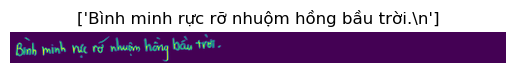

['Tiếng chim hót líu lo chào đón ngày mới.\n']


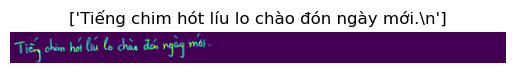

['Gió thoang thoảng mang theo hương hoa cỏ.\n']


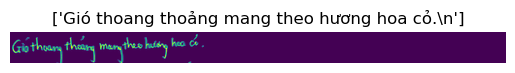

['Bông hoa khoe sắc thắm dưới ánh nắng mai.']


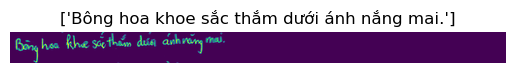

['Bầy ong chăm chỉ hút mật ong từ hoa.\n']


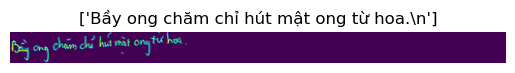

['Dòng suối róc rách chảy qua những tảng đá.\n']


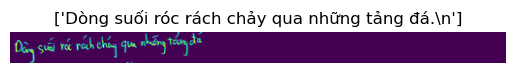

['Bầu trời xanh biếc điểm xuyết mây trắng.\n']


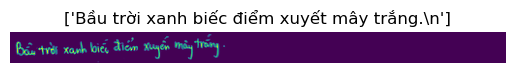

['Cánh đồng lúa xanh mướt trải dài chân trời.\n']


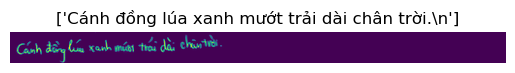

['Chim bay lượn tự do trên bầu trời cao.\n']


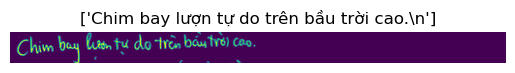

['Ngôi nhà nhỏ bình yên bên sườn đồi.\n']


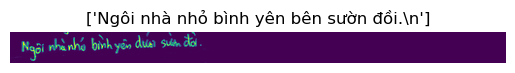

['Khói lam bay lên từ mái nhà tranh.\n']


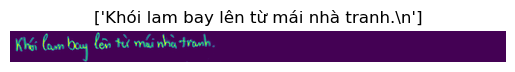

['Dòng sông quê êm đềm chảy qua làng.\n']


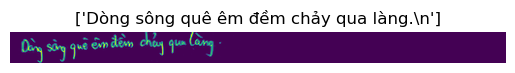

In [19]:
root = 'data/raw/tandat'

for _, path in enumerate(os.listdir(root + '/img')):
    imgpath = root + '/img/' + path
    labelpath = root + '/text/' + os.path.splitext(path)[0] + '.txt'

    img = utils.img_loader(imgpath)
    plt.imshow(img[0])
    with open(labelpath, 'r') as f:
        s = f.readlines()
        print(s)
    plt.title(s)
    plt.axis('off')
    plt.show()
    if _ > 10: break

# Lọc các file

In [9]:
import os

def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            return content
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def delete_file(file_path):
    try:
        os.remove(file_path)
        return
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def count_words(text):
    return len(text.split())

In [37]:
cnt = 0
list_len = []
char_list = set()
root = 'data/1'
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpth = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        with open(labelpth, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            char_list.update(set(content))
            char_count = len(content)
            list_len.append(char_count)
            
        if char_count in range(51, 96):
            cnt += 1
            # shutil.move(imgpath, 'data/img/') # Di chuyển file 
            # shutil.move(labelpth, 'data/label/') # Di chuyển file 
cnt

6273

In [38]:
l = list(char_list)
char = ''.join(sorted(l))
char


' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [39]:
len(char)

154

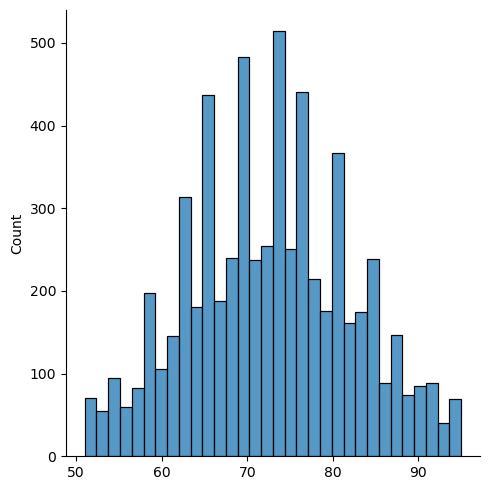

In [5]:
sns.displot(list_len)

# Visulization

In [3]:
from dataset import DatasetImg
from PIL import Image
import os
import matplotlib.pyplot as plt

from utils import utils

['Bình minh rực rỡ nhuộm hồng bầu trời.\n']


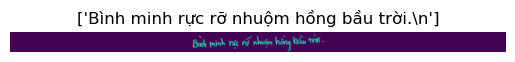

['Tiếng chim hót líu lo chào đón ngày mới.\n']


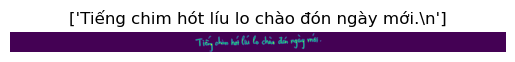

In [6]:
path = 'data/raw/tandat/'
for i in range(2):
    img = utils.img_loader(path + 'img/tandat_data_000' + str(i) + '.png', imgW = 800)
    plt.imshow(img[0])
    with open(path + 'text/tandat_data_000' + str(i) + '.txt', 'r') as f:
        s = f.readlines()
        print(s)
    plt.title(s)
    plt.axis('off')
    plt.show()

In [19]:
def display(imgdata, num = 5, raw = True):
    if raw:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = Image.open(imgdata + '/' + imgpath)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            if i > num : break
    else:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = utils.img_loader(imgdata + '/' + imgpath)
            plt.imshow(img[0])
            plt.axis('off')
            plt.show()
            if i > num : break

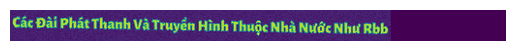

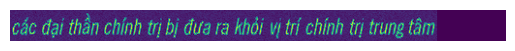

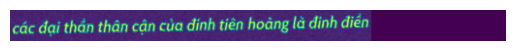

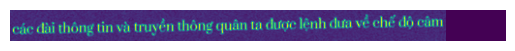

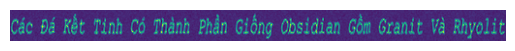

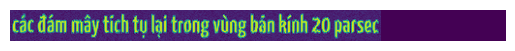

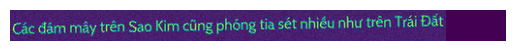

In [20]:
display('data/data2/train/img', raw = False)

# Tạo dataframe lưu thong tin data

In [3]:
os.listdir('data/data1/img').__len__()

6273

In [4]:
data = {
    'img_name': [],
    'text': []
}

for name in os.listdir('data/data1/img'):
    with open('data/data1/label/' + os.path.splitext(name)[0] + '.txt' ) as f:
        content = f.readline().rstrip('\n').strip()
    data['img_name'].append(name)
    data['text'].append(content)

In [5]:
df = pd.DataFrame(data)

In [7]:
df.to_csv('ground_truth.csv')